In [170]:
import scipy.stats as st
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm

# ESERCIZIO 0

### Domanda 1

V.A $X$ che assume valori {-1,1}. Indichiamo con $p = \mathbb{P}(X=1)$ 

$\mathbb{P}(X=-1) = 1 - \mathbb{P}(X=1) = 1-p $

### Domanda 2 - 3

Calcolare in funzione di $p$ il valore atteso di X1

$\mathbb{E}(X) = 1*p + -1 * (1-p)$

$\mathbb{E}(X) = p + -1 * (1-p)$

$\mathbb{E}(X) = p + -1 + p$

$\mathbb{E}(X) = 2p -1$

$\mathbb{E}(X) + 1 = 2p$

$p = \frac{\mathbb{E}(X) + 1}{2} $

### Domanda 4

Quali valori può assumere $Y=g(x)=X^2 $

$Y$ può assumere il valore 1

### Domanda 5

$$\mathbb{E}(Y) = 1$$
$$\mathbb{E}(Y) = \mathbb{E}(X^2) = p + (1-p) = 1$$

### Domanda 6

calcolare la varianza di X in funzione di P

$$Var(X) = E(X^2)-E(X)^2$$
$$Var(X) = 1-(2p-1)^2$$
$$Var(X) = 1-4p^2-1+4p$$
$$Var(X) = -4p^2+4p$$

### Domanda 7

trasformazione di h che permetta di portare la variabile X in una bernoulliana

$f(X) = \frac{X+1}{2}$

### Domanda 8

fissiamo $p=0.7$

Z = bernoulliana

X = Generica {-1,1} tale che P(X=1) = 0.7 e P(X=-1)=0.3

Grafico fatto su carta, basta fare due considerazioni e si costruisce

# ESERCIZIO 1

### Domanda 1

Definiamo $\overline{X}_n$ la media campionaria di $X$

$$\mathbb{E}(\overline{X}_n) = \mathbb{E}(X) = 2p-1$$
$$Var(\overline{X}_n) = \frac{1}{n}\cdot Var(X) = \frac{-4p^2+4p}{n}$$

### Domanda 2

$T_n = \frac{1+\overline{X_n}}{2}$

$E(T_n) = E(\frac{1}{2}+\frac{\overline{X}}{2})=$

$\frac{1}{2}E(\overline{X})+\frac{1}{2}= \frac{1}{2}(2p-1)+\frac{1}{2} = p$

Non è distorto per p. Altro modo possibile sarebbe calcolando il bias e vedere se restituisce zero

### Domanda 3

Fatto pure questo su carta, di base basta verificare calcolando a sinistra se viene uguale a destra.

# Esercizio 4

Sia $G$ una V.A Esponenziale di parametro $\lambda$

### Domanda 1

$G$ può assumere valori da 0 ad infinito

### Domanda 2

$f_X(x) = \lambda * e ^{-\lambda*x}$

### Domanda 3

Per $\lambda = 0.1$ tracciare il grafico

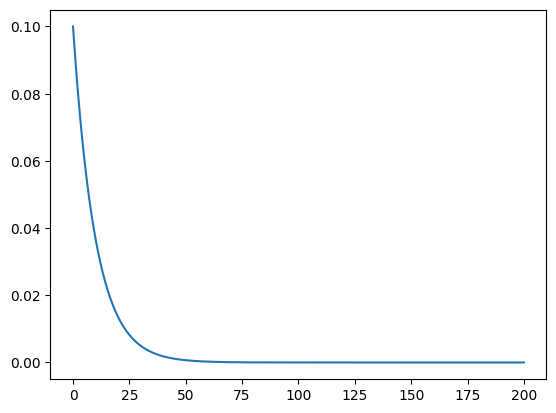

In [144]:
lamb=2
dist=st.expon(scale=10)
x = np.arange(0,200,0.01)
y = np.arange(0,0.1,0.01)
plt.plot(x,dist.pdf(x))
plt.show()

### Domanda 4

$$  Var(X) = \frac{1}{\lambda}*\frac{1}{\lambda} = \mathbb{E}(X)^2$$
$$  Std(X) =  \sqrt{\mathbb{E}(X)^2} = \mathbb{E}(X)$$

### Domanda 5

Grafico A ha un valore atteso maggiore poichè l'area tra Y e il grafico è maggiore.

# Esercizio 3

In [145]:
df = pd.read_csv("carsharing.csv",sep=';',decimal=',')
df

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
2,105,FRAME D,1,-1,0.4,4.1
3,110,FRAME D,1,1,2.8,5.0
4,110,FRAME B,1,-1,2.7,5.6
...,...,...,...,...,...,...
387,996,FRAME C,0,-1,12.5,13.1
388,996,FRAME A,0,1,14.5,17.0
389,996,FRAME C,0,-1,9.8,17.8
390,997,FRAME B,1,-1,1.8,4.0


## Gruppo 1

In [146]:
len(df)

392

In [147]:
df['TimeFrame'].describe()

count         392
unique          5
top       FRAME B
freq          123
Name: TimeFrame, dtype: object

## Gruppo 2

In [148]:
len(df['TimeFrame'].unique())

5

Facendo il describe posso vedere che la fascia oraria con maggiori visite è la B

In [149]:
abs_rel=pd.crosstab(index=df['TimeFrame'],columns=df['RushHour'], normalize=True)
abs_rel

RushHour,0,1
TimeFrame,,
FRAME A,0.119898,0.000000
FRAME B,0.000000,0.313776
FRAME C,0.272959,0.000000
FRAME D,0.000000,0.239796
FRAME E,0.053571,0.000000


Frame B
Frame D

In [150]:
premium=(df[df['PremiumCustomer']==1])
premium

,CarIdentifier,TimeFrame,RushHour,PremiumCustomer,Distance,Time
0,102,FRAME D,1,1,3.0,7.9
1,103,FRAME D,1,1,5.3,13.9
3,110,FRAME D,1,1,2.8,5.0
6,111,FRAME B,1,1,9.3,30.6
10,121,FRAME B,1,1,0.8,4.4
...,...,...,...,...,...,...
382,987,FRAME A,0,1,18.7,25.2
383,989,FRAME A,0,1,7.7,13.1
386,995,FRAME B,1,1,2.1,4.4
388,996,FRAME A,0,1,14.5,17.0


## Gruppo 3

In [151]:
print("Numero utenti premium: "+str(len(premium)))

Numero utenti premium: 227


In [152]:
print("Distanza media utenti premium: "+str(premium['Distance'].mean().round()) +" km ")

Distanza media utenti premium: 8.0 km 


In [153]:
prob_premium =round((len(premium)/len(df))*100)
print("Prob Premium: "+str(prob_premium)+" %")

Prob Premium: 58 %


## Gruppo 4

In [154]:
distance=df['Distance']

Distance è un carattere scalare poichè identifica una velocità sotto forma di numeri che rappresentano i km

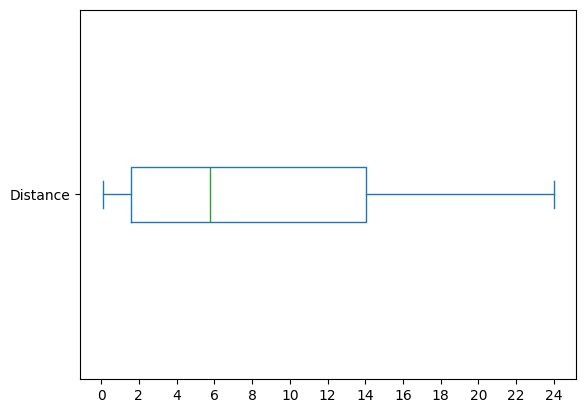

In [155]:
distance.plot.box(vert=False)
x = np.arange(0,26,2)
plt.xticks(x)
plt.show()

Come indici di centralità penso che Moda, Mediana e media siano i piu utili per darci una idea di come sono i dati genericamente

In [156]:
distance.median()

5.75

In [157]:
distance.mean()

7.858673469387755

In [158]:
distance.mode()

0    0.3
Name: Distance, dtype: float64

Come indici di dispersione ha senso analizzare la deviazione standard

In [159]:
distance.std()

6.8051226586667

Per verificare se vi è relazione tra la distanza percorsa ed il tempo trascorso dobbiamo utilizzare uno scatter plot.

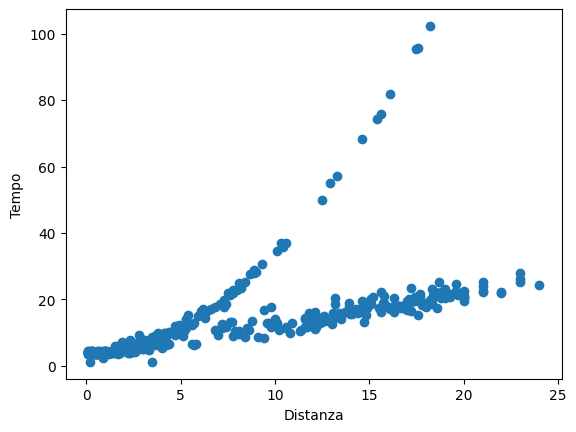

In [160]:
tempo=df['Time']
plt.scatter(distance,tempo)
plt.xlabel("Distanza")
plt.ylabel("Tempo")
plt.show()

La relazione che pare essere presente è una lineare diretta nonostante la strana biforcazione. Sicuramente quindi vi è qualcosa che influisce maggiormente nel tempo impiegato. Probabilmente il fattore che influisce maggiormente è la velocità. Macchine a velocità diverse impiegano tempi diversi a percorrere le stesse distanze.

In [161]:
distance.corr(tempo)

0.6273992247694645

una valore della correlazione di Pearson pari a 62 ci indica che è ben probabile che vi sia una correlazione diretta tra i due caratteri proposti.

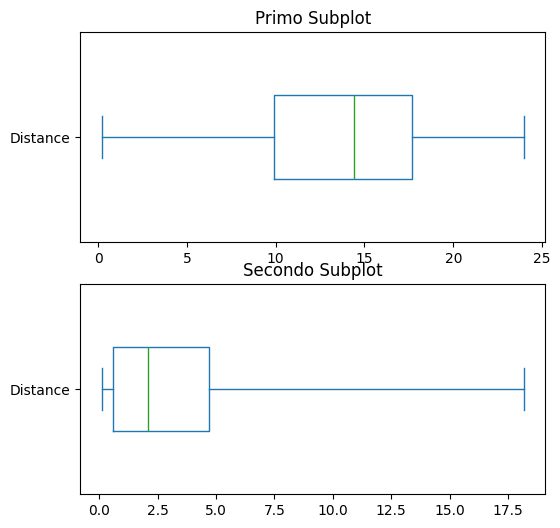

In [168]:
distance_rush=df[df['RushHour']==1]['Distance']
distance_non_rush=df[df['RushHour']==0]['Distance']

# Creazione della figura con due subplot verticali
# figsize è una tupla che determina le dimensioni della figura: (larghezza, altezza)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(6, 6))

# Disegna il boxplot per la serie 'distance_non_rush' nel primo subplot
distance_non_rush.plot.box(vert=False, whis=[0, 100], ax=ax1, widths=0.4)
# Imposta un titolo per il primo subplot
ax1.set_title('Primo Subplot')

# Disegna il boxplot per la serie 'distance_rush' nel secondo subplot
distance_rush.plot.box(vert=False, whis=[0, 100], ax=ax2, widths=0.4)
# Imposta un titolo per il secondo subplot
ax2.set_title('Secondo Subplot')

# Nascondi l'etichetta dell'asse y per il primo subplot
ax1.yaxis.label.set_visible(False)

# Mostra il grafico
plt.show()

# Esercizio 5

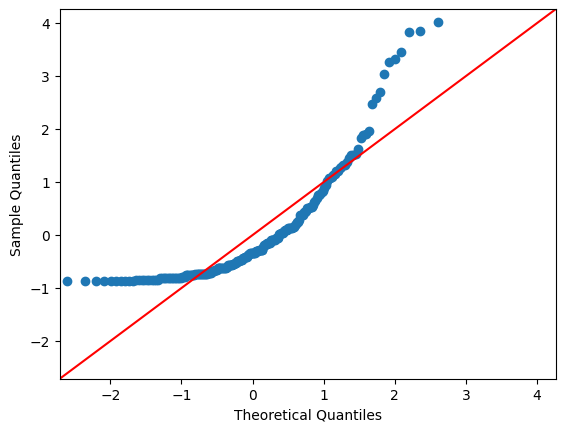

In [176]:
sm.qqplot(distance_rush,fit=True,line='45', dist=st.norm)
plt.show()

<Axes: ylabel='Frequency'>

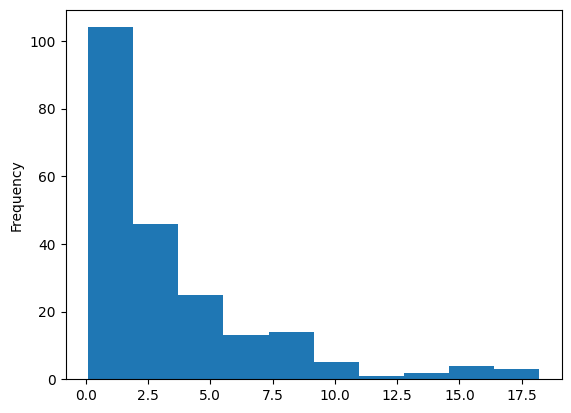

In [178]:
distance_rush.plot.hist()